# Importing Libraries

In [1]:
import numpy as np
import keras
from keras.models import load_model 
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

Using TensorFlow backend.


# Loading Image Datas

In [2]:
train_path = 'myFaces/Me/train'
test_path  = 'myFaces/Me/test'
valid_path = 'myFaces/Me/valid'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),classes=['Me'],batch_size = 10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224),classes=['Me'],batch_size = 4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224),classes=['Me'],batch_size = 10)

Found 640 images belonging to 1 classes.
Found 256 images belonging to 1 classes.
Found 14 images belonging to 1 classes.


In [4]:
train_samples = 640
valid_samples = 256
test_samples = 14
no_epoch = 10

# Plotting Images with Labels

In [5]:
#plotting image with labels
def plots(ims, figsize=(12,6), rows = 1, interp = False, titles = None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation = None if interp else 'none')

In [6]:
imgs, labels = next(train_batches)

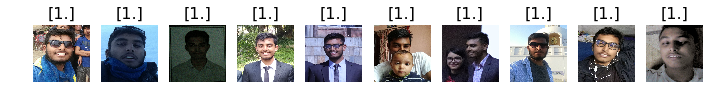

In [8]:
plots(imgs,titles = labels)

# Building and Training a CNN

In [9]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape=(224,224,3)),
    Flatten(),
    Dense(1, activation = 'softmax'),
])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.compile(Adam(lr=0.0001), loss = 'mean_squared_error', metrics = ['accuracy'])

In [11]:
model.fit_generator(train_batches, steps_per_epoch = 64,
                   validation_data = valid_batches, validation_steps = 64, epochs = 10, verbose = 2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 33s - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/10
 - 34s - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/10
 - 35s - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/10
 - 31s - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/10
 - 36s - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 6/10
 - 34s - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/10
 - 36s - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 8/10
 - 31s - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 9/10
 - 31s - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 10/10
 - 36s - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000


# Save and Load Model

In [12]:
model.save('myfaces.h5')

In [13]:
from keras.models import load_model
new_model = load_model('myfaces.h5')

In [14]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1577089   
Total params: 1,577,985
Trainable params: 1,577,985
Non-trainable params: 0
_________________________________________________________________


In [15]:
new_model.get_weights()

[array([[[[ 1.31788865e-01, -1.01698935e-03, -8.19718689e-02,
           -9.48586762e-02,  5.18265218e-02, -3.02930996e-02,
            1.61729455e-02, -5.06758988e-02, -8.51994157e-02,
           -6.09530509e-02,  8.41403753e-02,  7.12188482e-02,
           -4.51644585e-02,  1.19170055e-01, -8.57218057e-02,
            1.09293789e-01,  5.89131713e-02, -1.25873238e-01,
           -1.72897726e-02,  5.16773611e-02, -2.77461931e-02,
           -8.61451998e-02, -1.03377715e-01, -1.09751299e-01,
           -1.35787651e-02,  5.75732887e-02, -2.05389336e-02,
            8.70008767e-03, -2.96234488e-02, -5.02916351e-02,
           -7.54137635e-02,  1.31952271e-01],
          [ 6.76797628e-02, -1.33097455e-01, -1.04788974e-01,
            6.29889369e-02, -5.51305264e-02, -1.04258940e-01,
           -6.52082115e-02,  4.08061147e-02, -1.37411833e-01,
           -2.40897685e-02,  8.35467875e-03,  5.14164269e-02,
           -5.68883121e-02,  5.33471555e-02,  7.14031160e-02,
           -1.13654435e-

In [16]:
new_model.optimizer